In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'Walmart.csv')

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


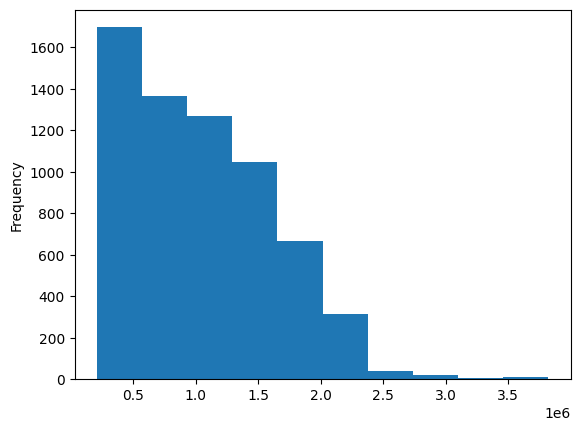

In [5]:
df['Weekly_Sales'].plot(kind='hist');

In [6]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

print("Missing values per column:")
print(missing_values)
print("\nNumber of duplicate rows:")
print(duplicates)


Missing values per column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Number of duplicate rows:
0


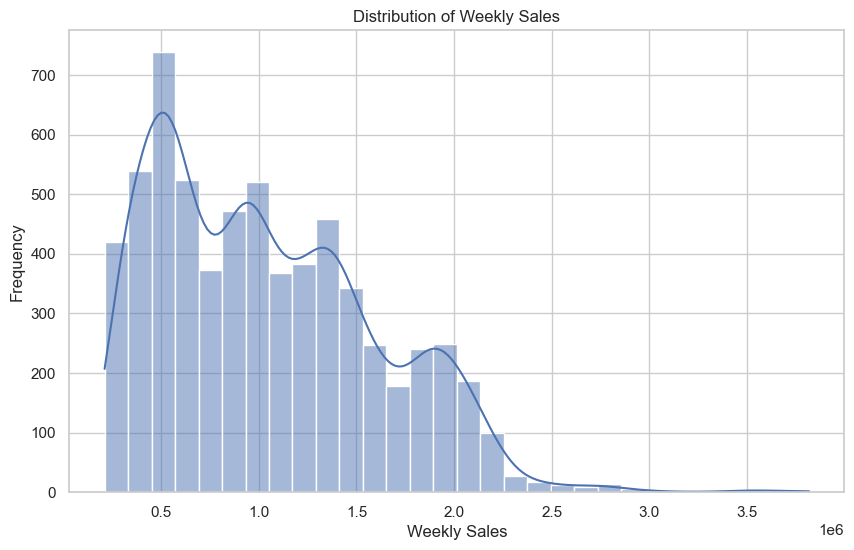

In [9]:
import seaborn as sns
# Set the style of the visualizations
sns.set_theme(style="whitegrid")

# Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

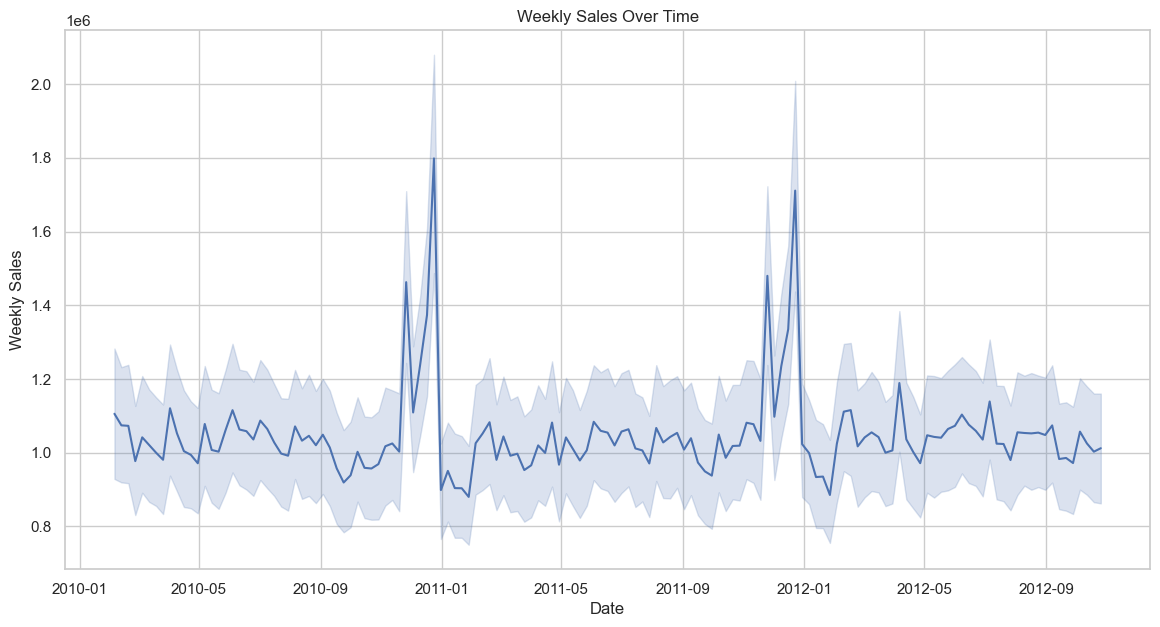

In [10]:

# Sales Trends Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

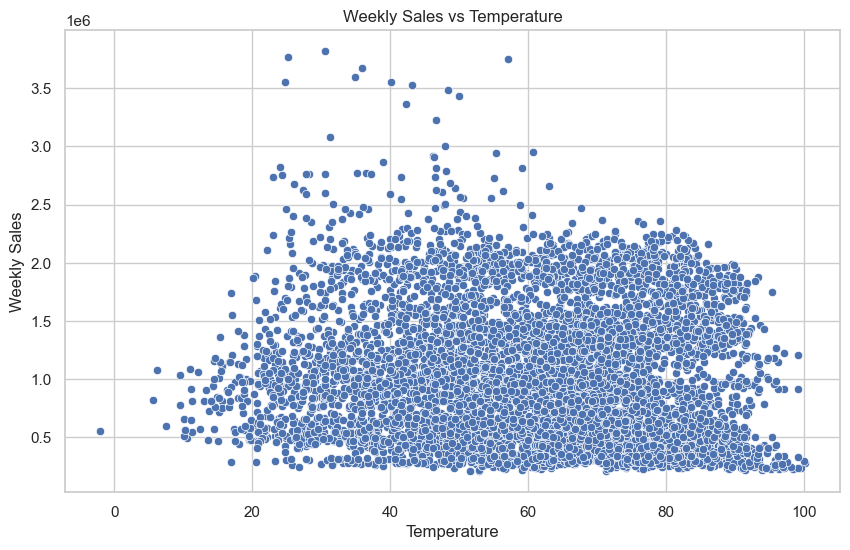

In [11]:
# Sales vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

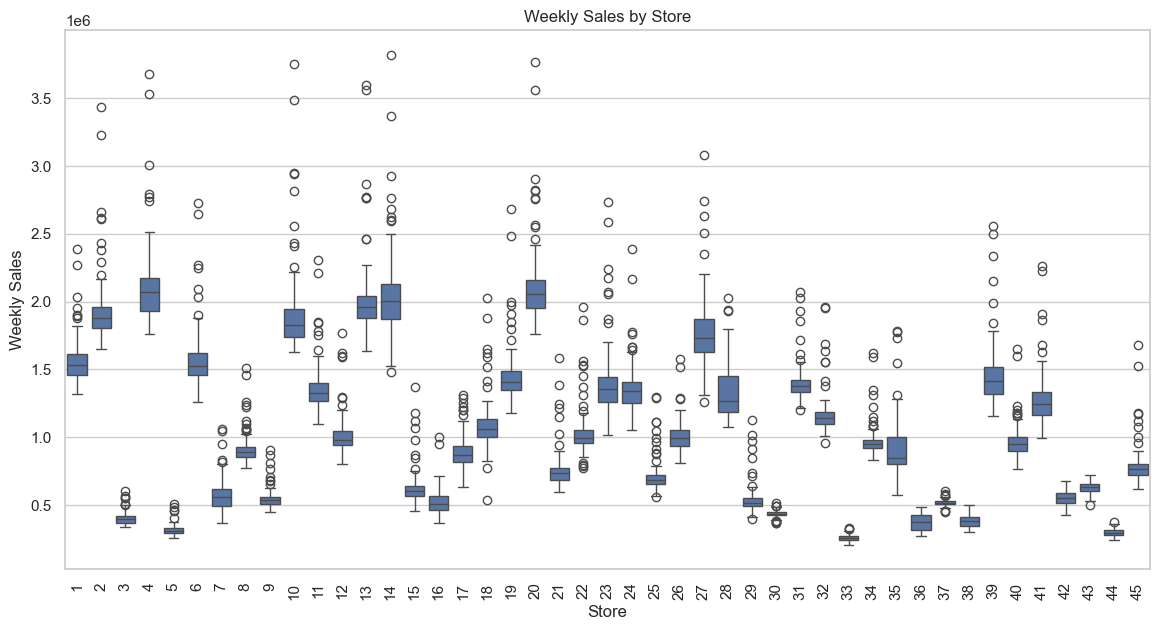

In [12]:
# Sales by Store
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Store', y='Weekly_Sales')
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=90)
plt.show()

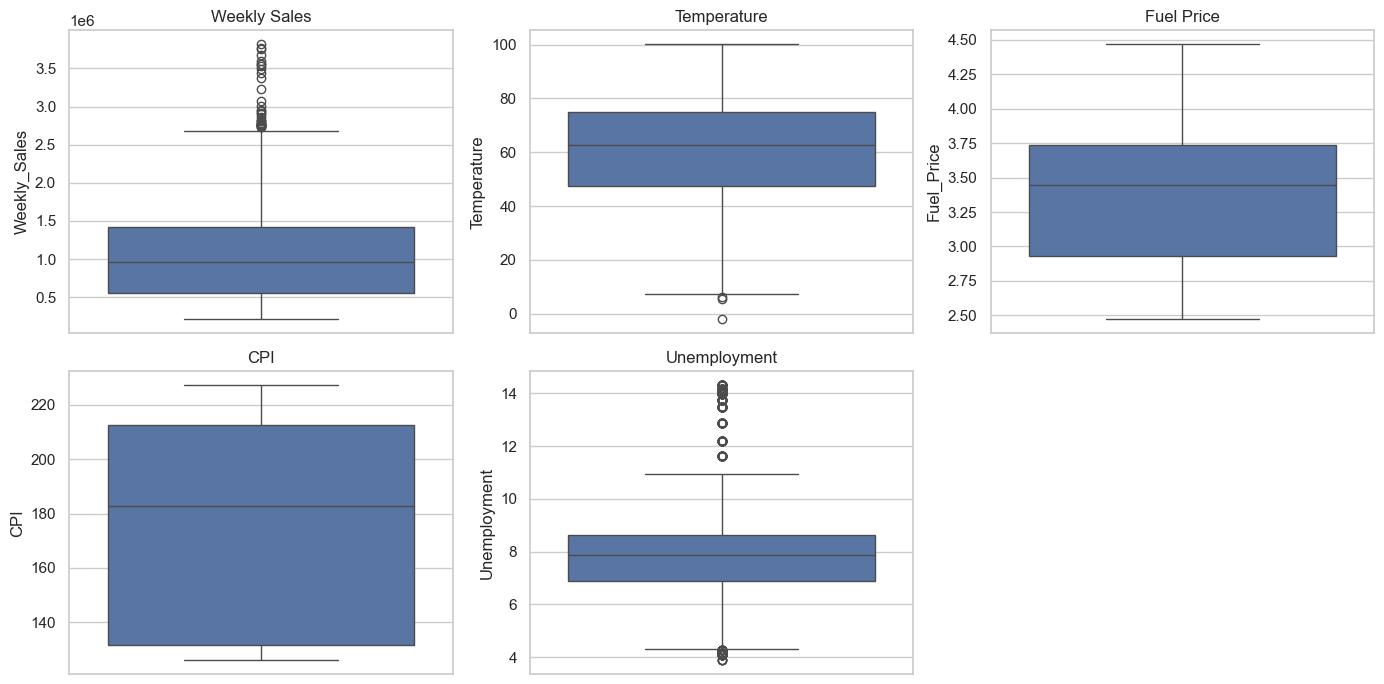

In [14]:
# Checking for outliers using box plots for relevant columns
plt.figure(figsize=(14, 7))
plt.subplot(2, 3, 1)
sns.boxplot(y=df['Weekly_Sales'])
plt.title('Weekly Sales')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['Temperature'])
plt.title('Temperature')

plt.subplot(2, 3, 3)
sns.boxplot(y=df['Fuel_Price'])
plt.title('Fuel Price')

plt.subplot(2, 3, 4)
sns.boxplot(y=df['CPI'])
plt.title('CPI')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['Unemployment'])
plt.title('Unemployment')

plt.tight_layout()
plt.show()

# Function to calculate outliers using IQR method
def calculate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Calculate outliers for each relevant column
weekly_sales_outliers = calculate_outliers(df['Weekly_Sales'])
temperature_outliers = calculate_outliers(df['Temperature'])
fuel_price_outliers = calculate_outliers(df['Fuel_Price'])
cpi_outliers = calculate_outliers(df['CPI'])
unemployment_outliers = calculate_outliers(df['Unemployment'])

# Summary of outliers
outliers_summary = {
    'Weekly_Sales_Outliers': weekly_sales_outliers,
    'Temperature_Outliers': temperature_outliers,
    'Fuel_Price_Outliers': fuel_price_outliers,
    'CPI_Outliers': cpi_outliers,
    'Unemployment_Outliers': unemployment_outliers
}

